In [36]:
import gymnasium as gym
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
import numpy as np
from bettermdptools.utils.plots import Plots
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

runtime = 0.01 seconds


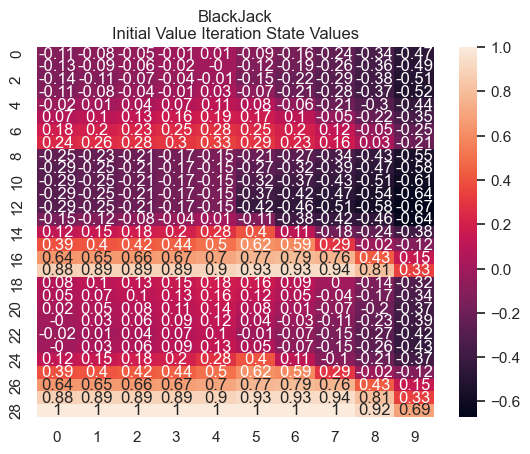

In [123]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=0.99,n_iters=5000)
size=(29,10)
Plots.values_heat_map(V, "BlackJack\nInitial Value Iteration State Values", size)

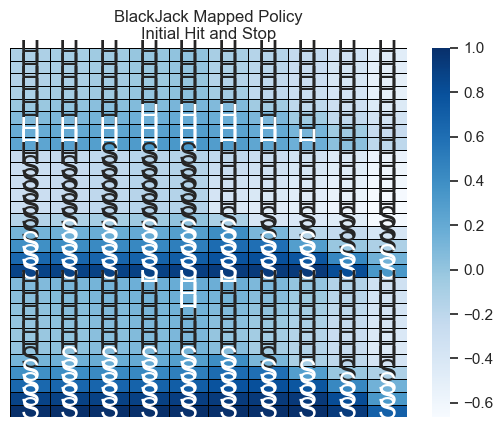

In [113]:
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)
title="BlackJack Mapped Policy\nInitial Hit and Stop"
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

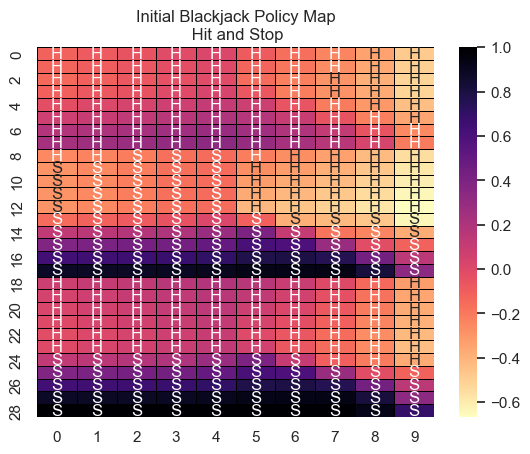

In [114]:
from bettermdptools.utils.decorators import add_to

@add_to(Plots)
@staticmethod
def modified_plot_policy(val_max, directions, map_size, title):
    """Plot the policy learned."""
    sns.heatmap(
        val_max,
        annot=directions,
        fmt="",
        cmap=sns.color_palette("magma_r", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
    ).set(title=title)
    img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"
    plt.show()

title = "Initial Blackjack Policy Map\n Hit and Stop"
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)
#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title)

### Value Iteration

/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")
/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


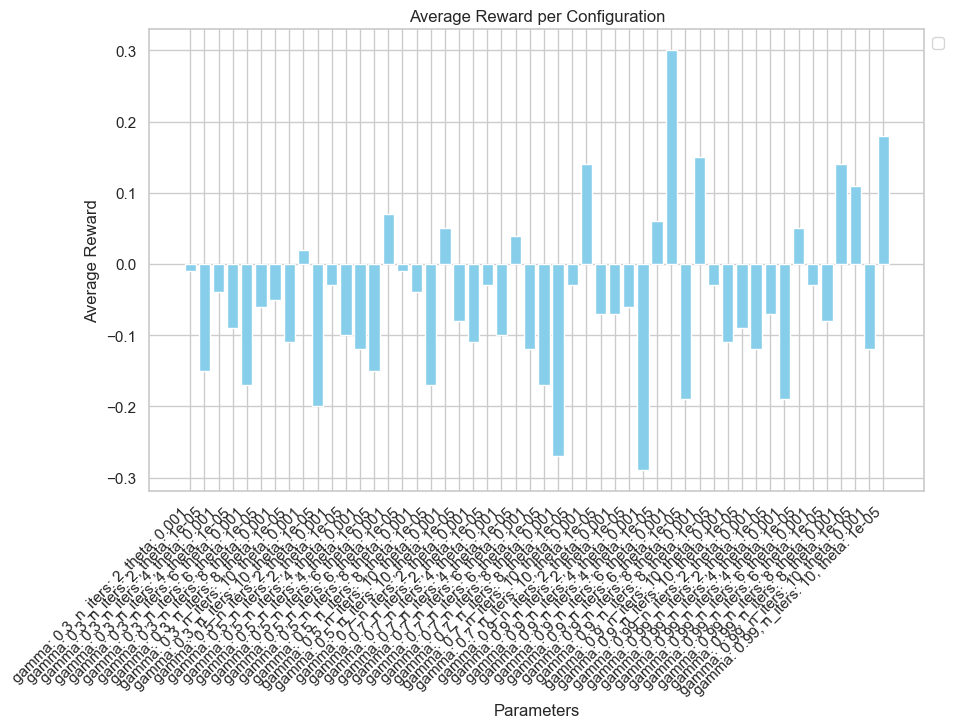

/var/folders/_4/67t44wh97g164tfsk_37l_tm0000gn/T/ipykernel_45047/1763073283.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


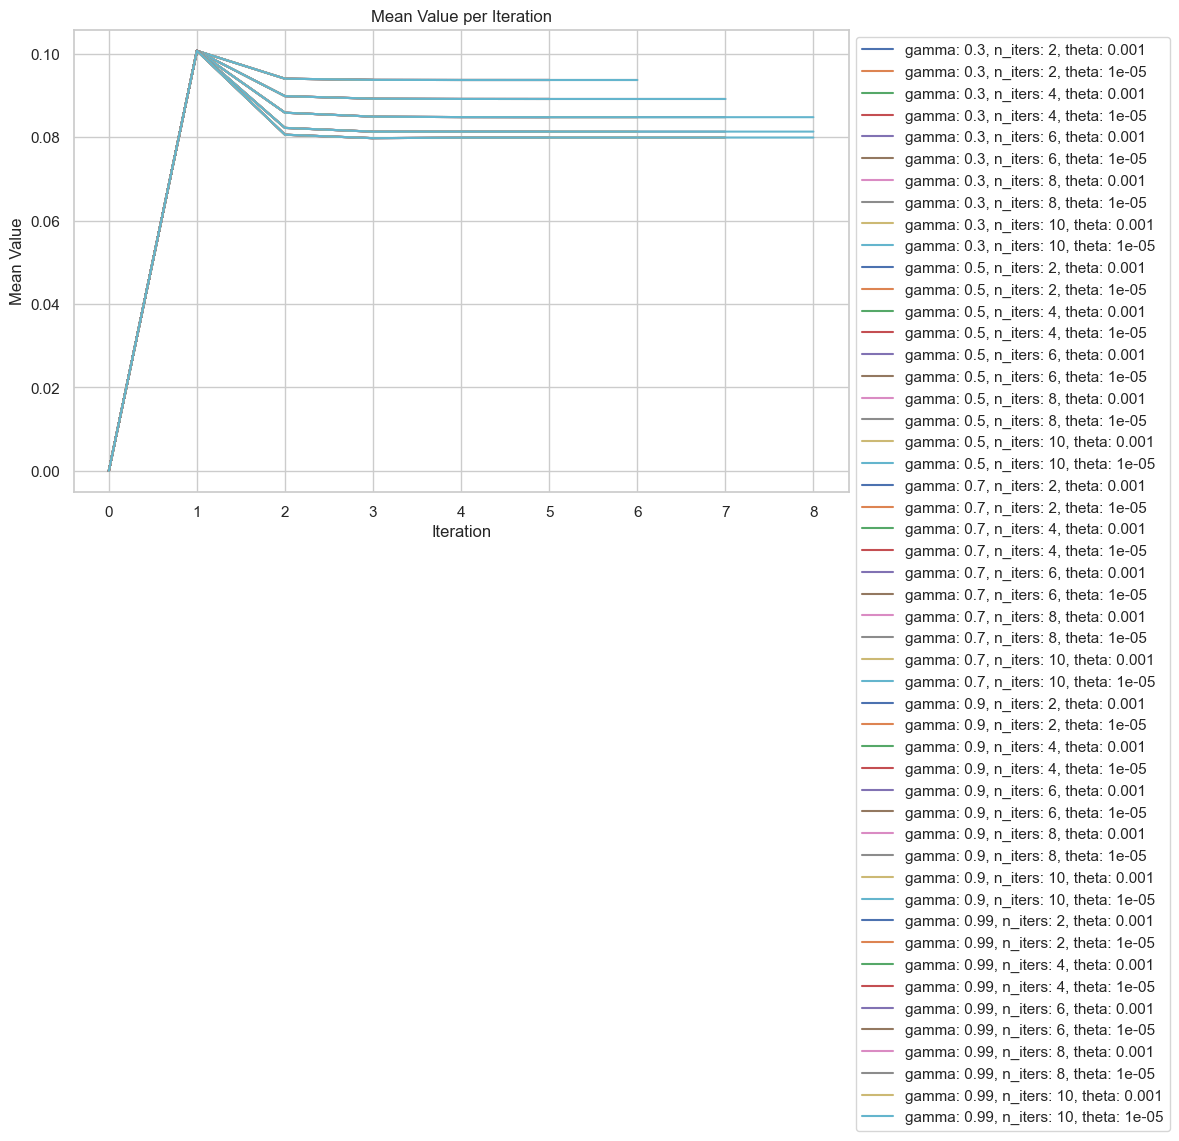

/var/folders/_4/67t44wh97g164tfsk_37l_tm0000gn/T/ipykernel_45047/1763073283.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


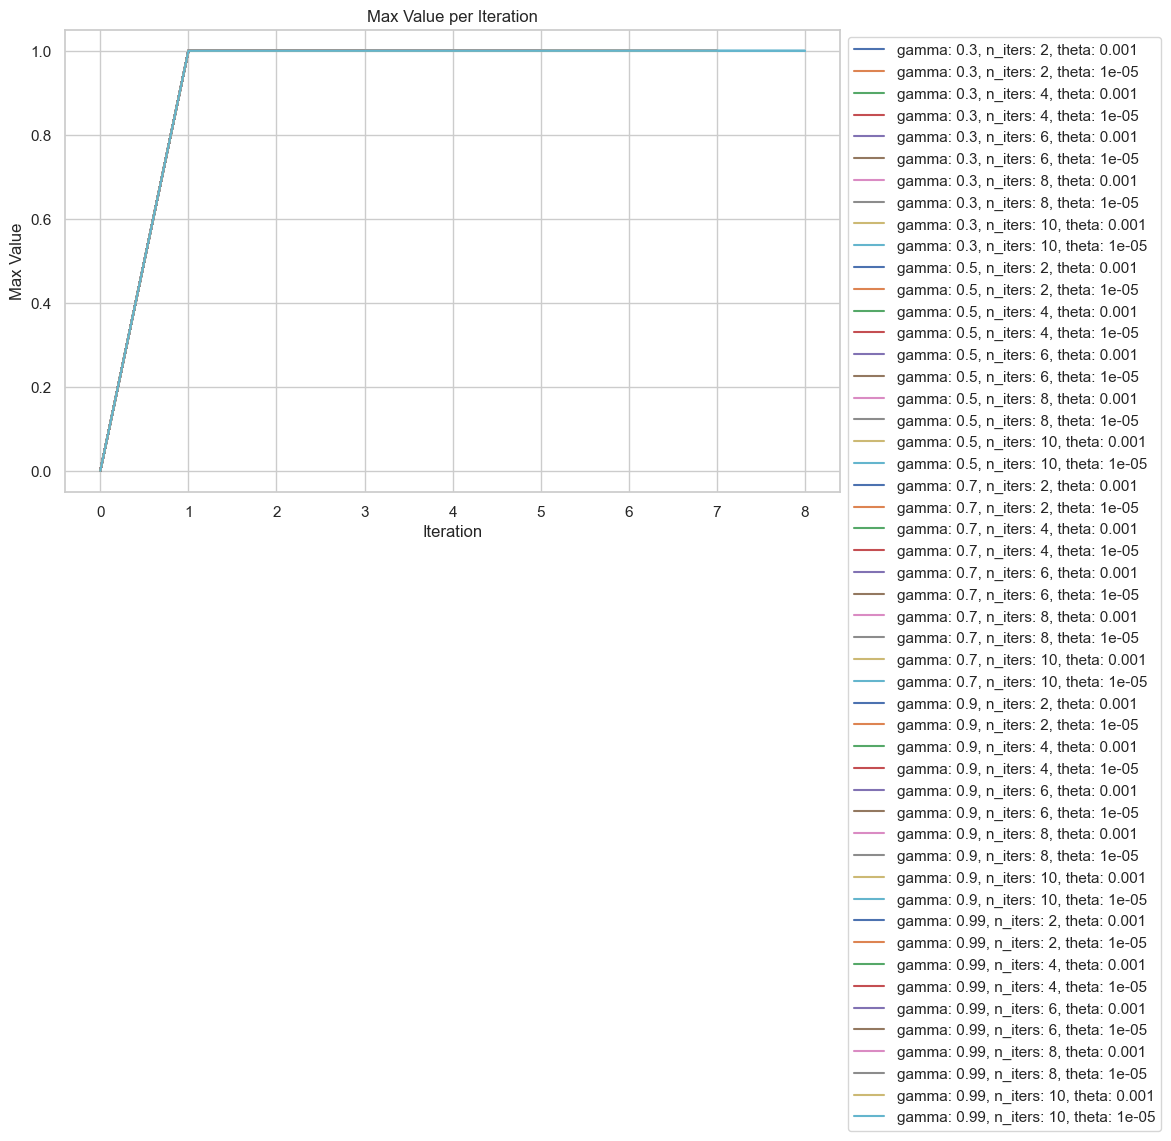

In [72]:
gamma=[.3, .5, .7, .9, .99]

iters = [2,4,6,8,10]
theta=[.001, .00001]
reward = {}
mean_vi = {}
max_vi = {}
for i in itertools.product(gamma, iters, theta):
    
    parameters = f"gamma: {i[0]}, n_iters: {i[1]}, theta: {i[2]}"
    V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=100, pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward
    mean_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
    max_value_per_iter = np.trim_zeros(np.max(V_track, axis=1), 'b')
    mean_vi[parameters] = [np.arange(len(mean_value_per_iter)).tolist(), mean_value_per_iter.tolist()]
    max_vi[parameters] = [np.arange(len(max_value_per_iter)).tolist(), max_value_per_iter.tolist()]

# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in mean_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Mean Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot for max_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in max_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Max Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Max Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
    

runtime = 0.01 seconds


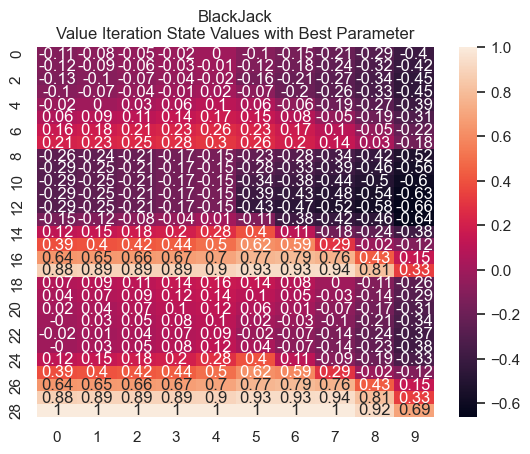

In [73]:
#0.9 6 0.001
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=0.9,n_iters=6, theta=0.001)
size=(29,10)
Plots.values_heat_map(V, "BlackJack\nValue Iteration State Values with Best Parameter", size)

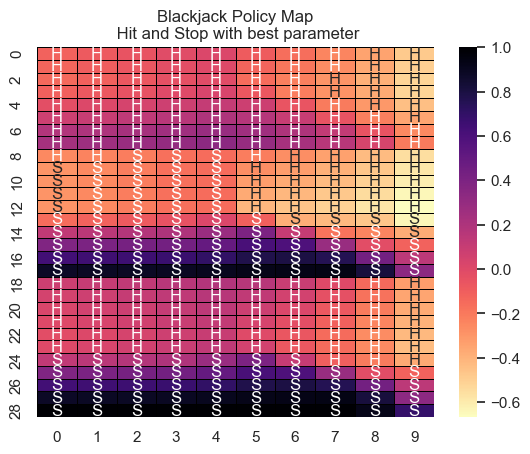

In [115]:
title = "Blackjack Policy Map\n Hit and Stop with best parameter"
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)
#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title)

### Policy Iteration

In [76]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=1000)

runtime = 0.03 seconds


/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/planner.py:126: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")
/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds


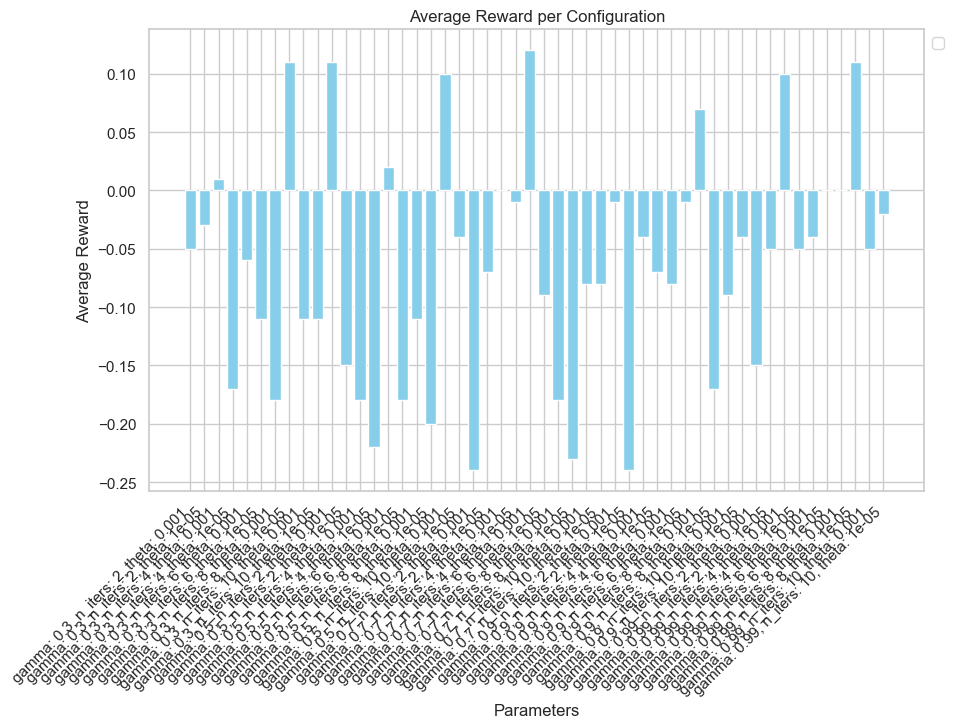

/var/folders/_4/67t44wh97g164tfsk_37l_tm0000gn/T/ipykernel_45047/3360978236.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


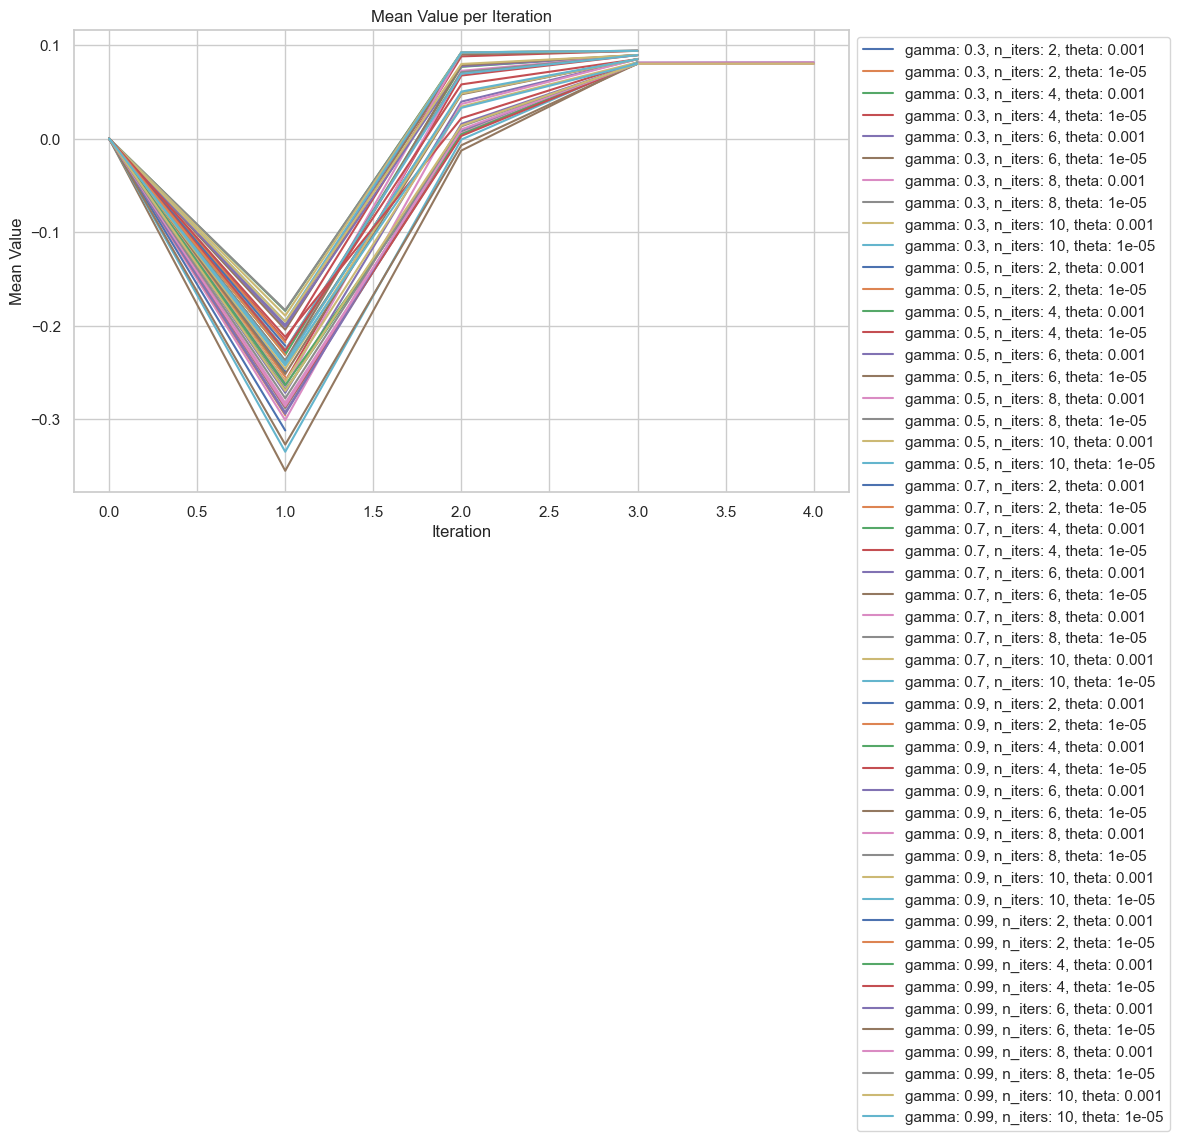

/var/folders/_4/67t44wh97g164tfsk_37l_tm0000gn/T/ipykernel_45047/3360978236.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


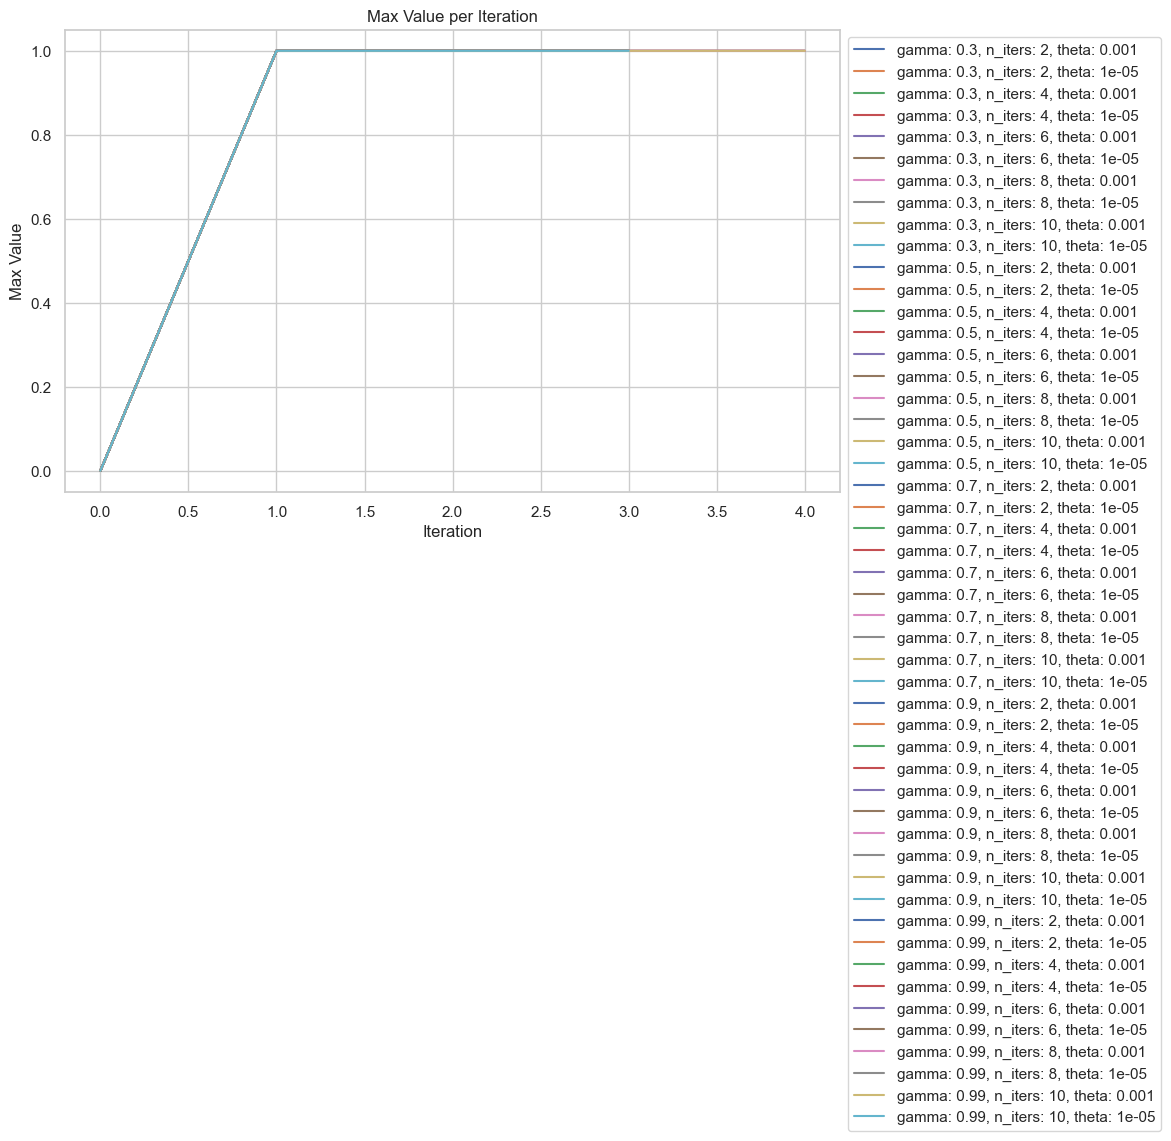

In [77]:
gamma=[.3, .5, .7, .9, .99]

iters = [2,4,6,8,10]
theta=[.001, .00001]
reward = {}
mean_vi = {}
max_vi = {}
for i in itertools.product(gamma, iters, theta):
    
    parameters = f"gamma: {i[0]}, n_iters: {i[1]}, theta: {i[2]}"
    V, V_track, pi = Planner(blackjack.P).policy_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=100, pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward
    mean_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
    max_value_per_iter = np.trim_zeros(np.max(V_track, axis=1), 'b')
    mean_vi[parameters] = [np.arange(len(mean_value_per_iter)).tolist(), mean_value_per_iter.tolist()]
    max_vi[parameters] = [np.arange(len(max_value_per_iter)).tolist(), max_value_per_iter.tolist()]

# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in mean_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Mean Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot for max_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in max_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Max Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Max Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
    

runtime = 0.01 seconds


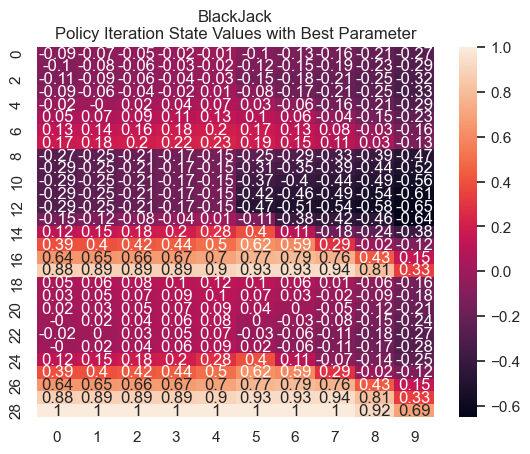

In [117]:
#0.7 6 0.00005

base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

V, V_track, pi = Planner(blackjack.P).policy_iteration(gamma=0.7,n_iters=6, theta=0.00005)
size=(29,10)
Plots.values_heat_map(V, "BlackJack\nPolicy Iteration State Values with Best Parameter", size)

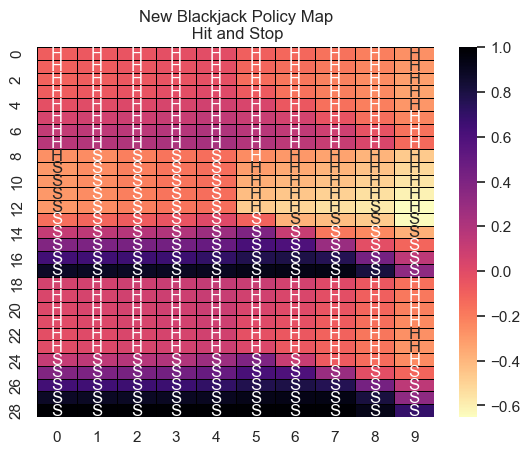

In [118]:
title = "New Blackjack Policy Map\n Hit and Stop"
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)
#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title)

### Q-Learning

In [108]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=5000)
print(Q_track)

  0%|          | 0/5000 [00:00<?, ?it/s]/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
                                                      

runtime = 0.22 seconds
[[[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 ...

 [[ 0.          0.        ]
  [-0.03402847 -0.00510568]
  [ 0.08672218  0.        ]
  ...
  [ 0.88023646  0.01440582]
  [ 0.9214596   0.40930413]
  [ 0.04900995 -0.00317478]]

 [[ 0.          0.        ]
  [-0.03402847 -0.00510568]
  [ 0.08672218  0.        ]
  ...
  [ 0.88023646  0.01440582]
  [ 0.9214596   0.40930413]
  [ 0.04900995 -0.00317478]]

 [[ 0.          0.        ]
  [-0.03402847 -0.00510568]
  [ 0.08672218  0.        ]
  ...
 

gamma: 0.3, e_decay: 0.3, n_epi: 10


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.3, n_epi: 20


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.3, n_epi: 30


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.5, n_epi: 10


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.5, n_epi: 20


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.5, n_epi: 30


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.7, n_epi: 10


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.7, n_epi: 20


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.7, n_epi: 30


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.9, n_epi: 10


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.9, n_epi: 20


runtime = 0.00 seconds
gamma: 0.3, e_decay: 0.9, n_epi: 30


runtime = 0.01 seconds
gamma: 0.5, e_decay: 0.3, n_epi: 10


runtime = 0.01 seconds
gamma: 0.5, e_decay: 0.3, n_epi: 20


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.3, n_epi: 30


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.5, n_epi: 10


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.5, n_epi: 20


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.5, n_epi: 30


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.7, n_epi: 10


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.7, n_epi: 20


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.7, n_epi: 30


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.9, n_epi: 10


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.9, n_epi: 20


runtime = 0.00 seconds
gamma: 0.5, e_decay: 0.9, n_epi: 30


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.3, n_epi: 10


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.3, n_epi: 20


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.3, n_epi: 30


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.5, n_epi: 10


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.5, n_epi: 20


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.5, n_epi: 30


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.7, n_epi: 10


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.7, n_epi: 20


runtime = 0.00 seconds


gamma: 0.7, e_decay: 0.7, n_epi: 30


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.9, n_epi: 10


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.9, n_epi: 20


runtime = 0.00 seconds
gamma: 0.7, e_decay: 0.9, n_epi: 30


runtime = 0.01 seconds
gamma: 0.9, e_decay: 0.3, n_epi: 10


runtime = 0.01 seconds
gamma: 0.9, e_decay: 0.3, n_epi: 20


runtime = 0.01 seconds
gamma: 0.9, e_decay: 0.3, n_epi: 30


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.5, n_epi: 10


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.5, n_epi: 20


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.5, n_epi: 30


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.7, n_epi: 10


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.7, n_epi: 20


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.7, n_epi: 30


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.9, n_epi: 10


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.9, n_epi: 20


runtime = 0.00 seconds
gamma: 0.9, e_decay: 0.9, n_epi: 30


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.3, n_epi: 10


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.3, n_epi: 20


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.3, n_epi: 30


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.5, n_epi: 10


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.5, n_epi: 20


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.5, n_epi: 30


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.7, n_epi: 10


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.7, n_epi: 20


runtime = 0.00 seconds


gamma: 0.99, e_decay: 0.7, n_epi: 30


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.9, n_epi: 10


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.9, n_epi: 20


runtime = 0.00 seconds
gamma: 0.99, e_decay: 0.9, n_epi: 30


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime = 0.00 seconds


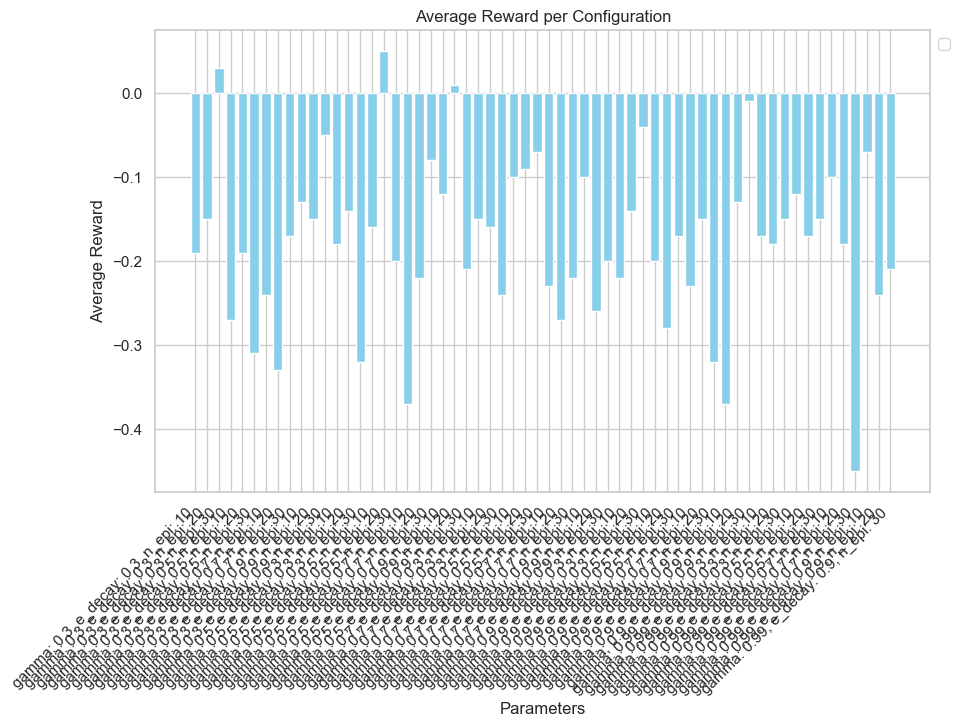

/var/folders/_4/67t44wh97g164tfsk_37l_tm0000gn/T/ipykernel_45047/741123123.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


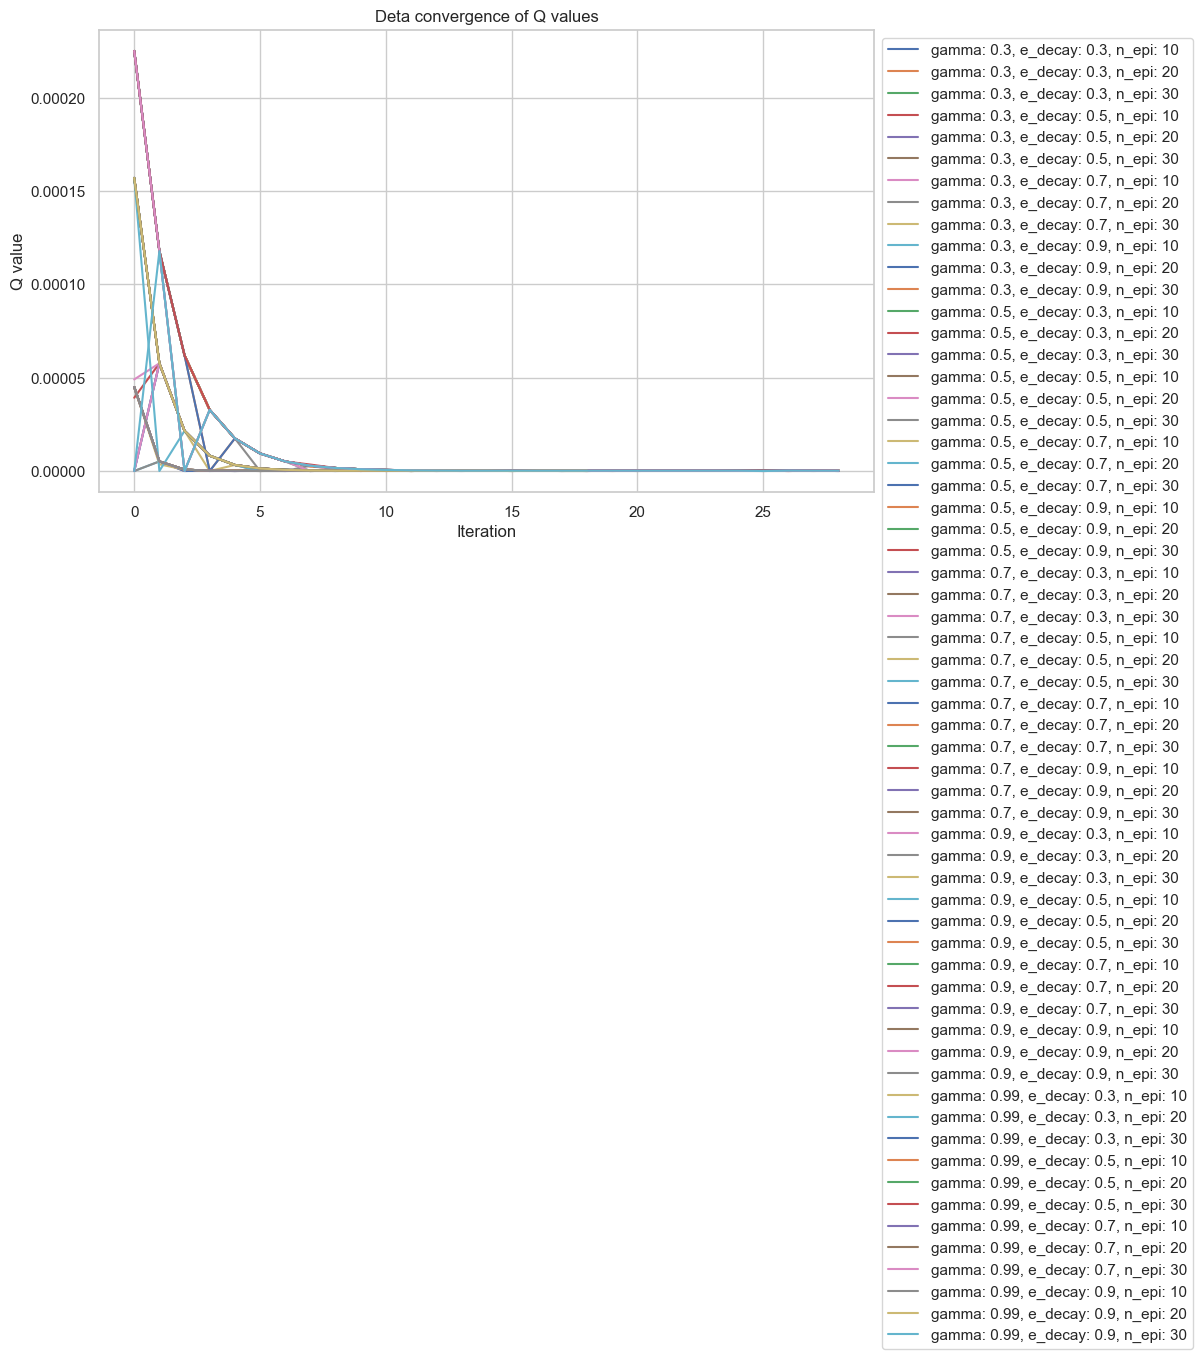

In [110]:
gamma=[.3, .5, .7, .9, .99]
iters = [10,20, 30]
epsilons=[0.3, 0.5, 0.7, 0.9]
reward = {}
q_val = {}
for i in itertools.product(gamma, epsilons, iters):
    
    parameters = f"gamma: {i[0]}, e_decay: {i[1]}, n_epi: {i[2]}"
    print(parameters)
    Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=i[0], epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=100, pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward

    q_value_changes = np.zeros(Q_track.shape[0]-1)
    for i in range(1, Q_track.shape[0]):
        q_value_changes[i - 1] = np.mean((Q_track[i] - Q_track[i - 1]) ** 2)

        # Plot the MSE values
    # plt.plot(q_value_changes, label=cur_title)
    q_val[parameters] = q_value_changes
# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, values in q_val.items():
    plt.plot(values, label=parameters)
plt.title("Deta convergence of Q values")
plt.xlabel("Iteration")
plt.ylabel("Q value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
